<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/08_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

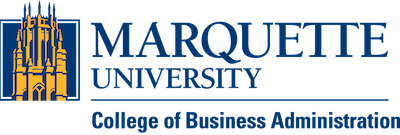

# BUAN 4061: Advanced Business Analytics
# Neural Networks Regression

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content provided by `Daniel Bourke` in his course: [Learn TensorFlow and Deep Learning fundamentals with Python](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=50s)

##Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms)
- Predict the coordinates of a bounding box of an item in an image
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race)

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs



###What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:

- Architecture of a regression model
- Input shapes and output shapes
 - `X`: features/data (inputs)
 - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
 - Creating a model
 - Compiling a model
   - Defining a loss function
   - Setting up an optimizer
   - Creating evaluation metrics
 - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
 - Visualizng the model ("visualize, visualize, visualize")
 - Looking at training curves
 - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.

##Typical architecture of a regresison neural network

The word typical is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number

Yes, the previous sentence is vague but we'll see this in action shortly

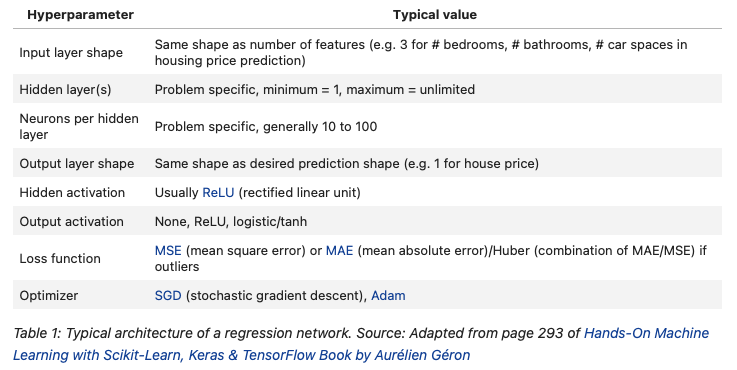

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

    🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves,
    where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst)

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-02-15 03:11:59.973202


##Creating data to view and fit

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model

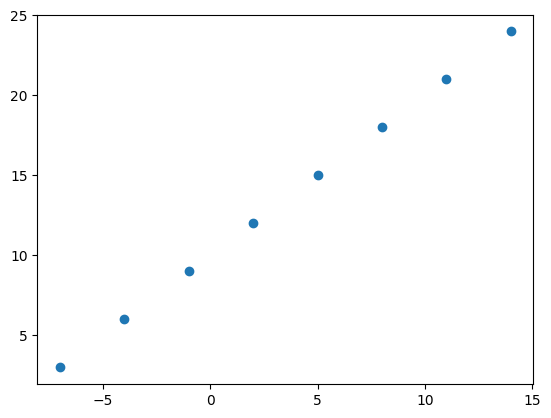

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Before we do any modelling, can you calculate the pattern between `X` and `y`?

For example, say I asked you, based on this data what the `y` value would be if `X` was `17.0`?

Or how about if `X` was `-10.0`?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us

In [ ]:
# Whats the relationship between X & y?
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

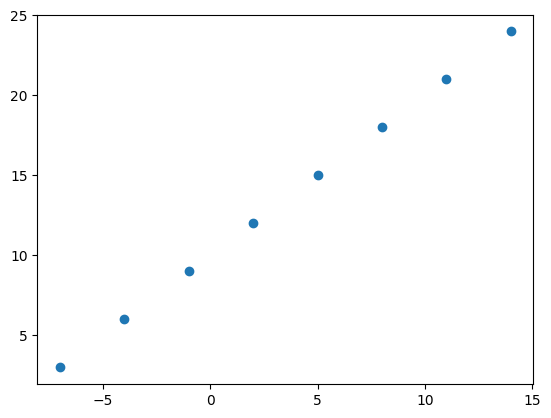

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Our goal here will be to use `X` to predict `y`.

So our input will be `X` and our output will be `y`.

Knowing this, what do you think our input and output shapes will be?

Let's take a look:

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

**It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor**.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line..." ....And you'd be right

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine)

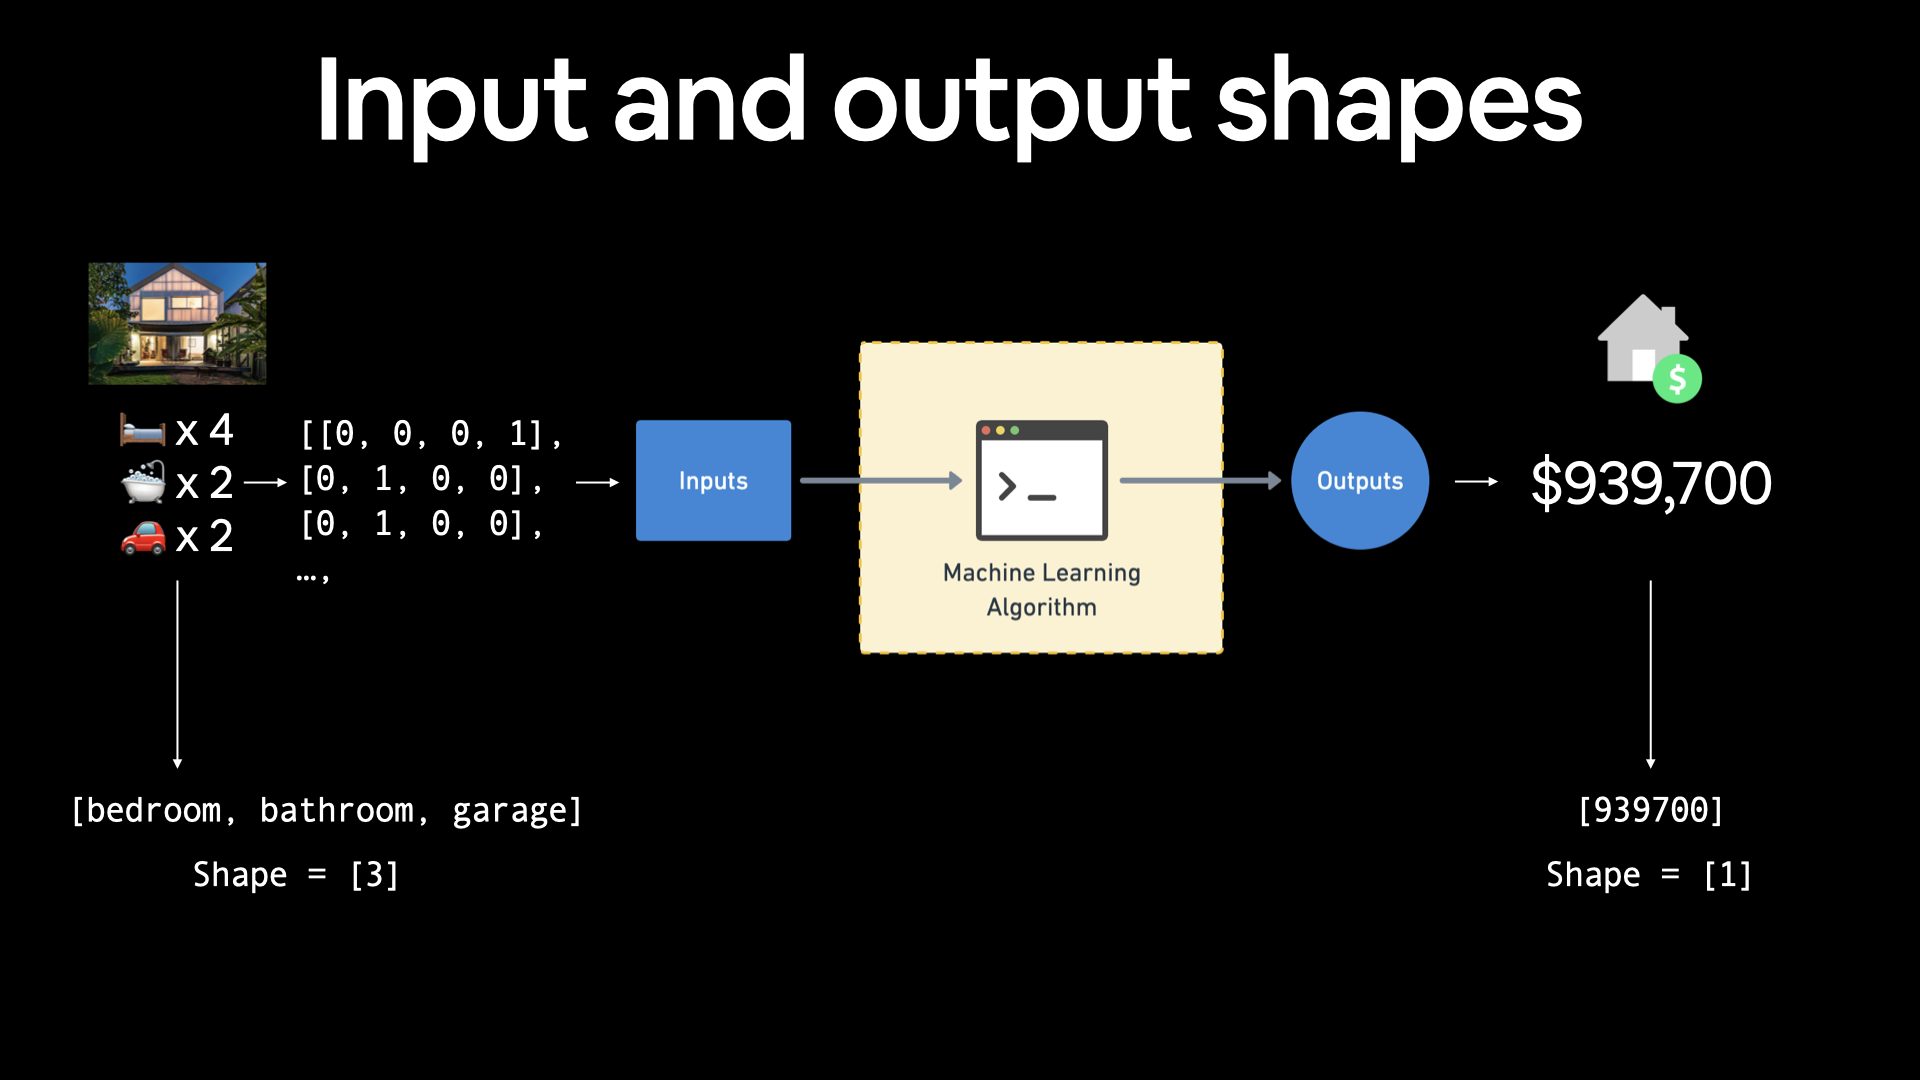

*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1*


##Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

    **Note**: If you're using [TensorFlow 2.7.0+](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0), the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`.
    To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent (Tells the model how to improve)
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 415ms/step - loss: 14.1354 - mae: 14.1354
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 14.0029 - mae: 14.0029
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 13.8704 - mae: 13.8704
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.7379 - mae: 13.7379
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 13.6054 - mae: 13.6054


Boom!

We've just trained a model to figure out the patterns between X and y.

How do you think it went?

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

What do you think the outcome should be if we passed our model an X value of 17.0?

In [ ]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[-0.06139723]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

    🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code,
    `keras` comes after `tf` (e.g. `tf.keras.layers.Dense())`?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

##**Improving a model**

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


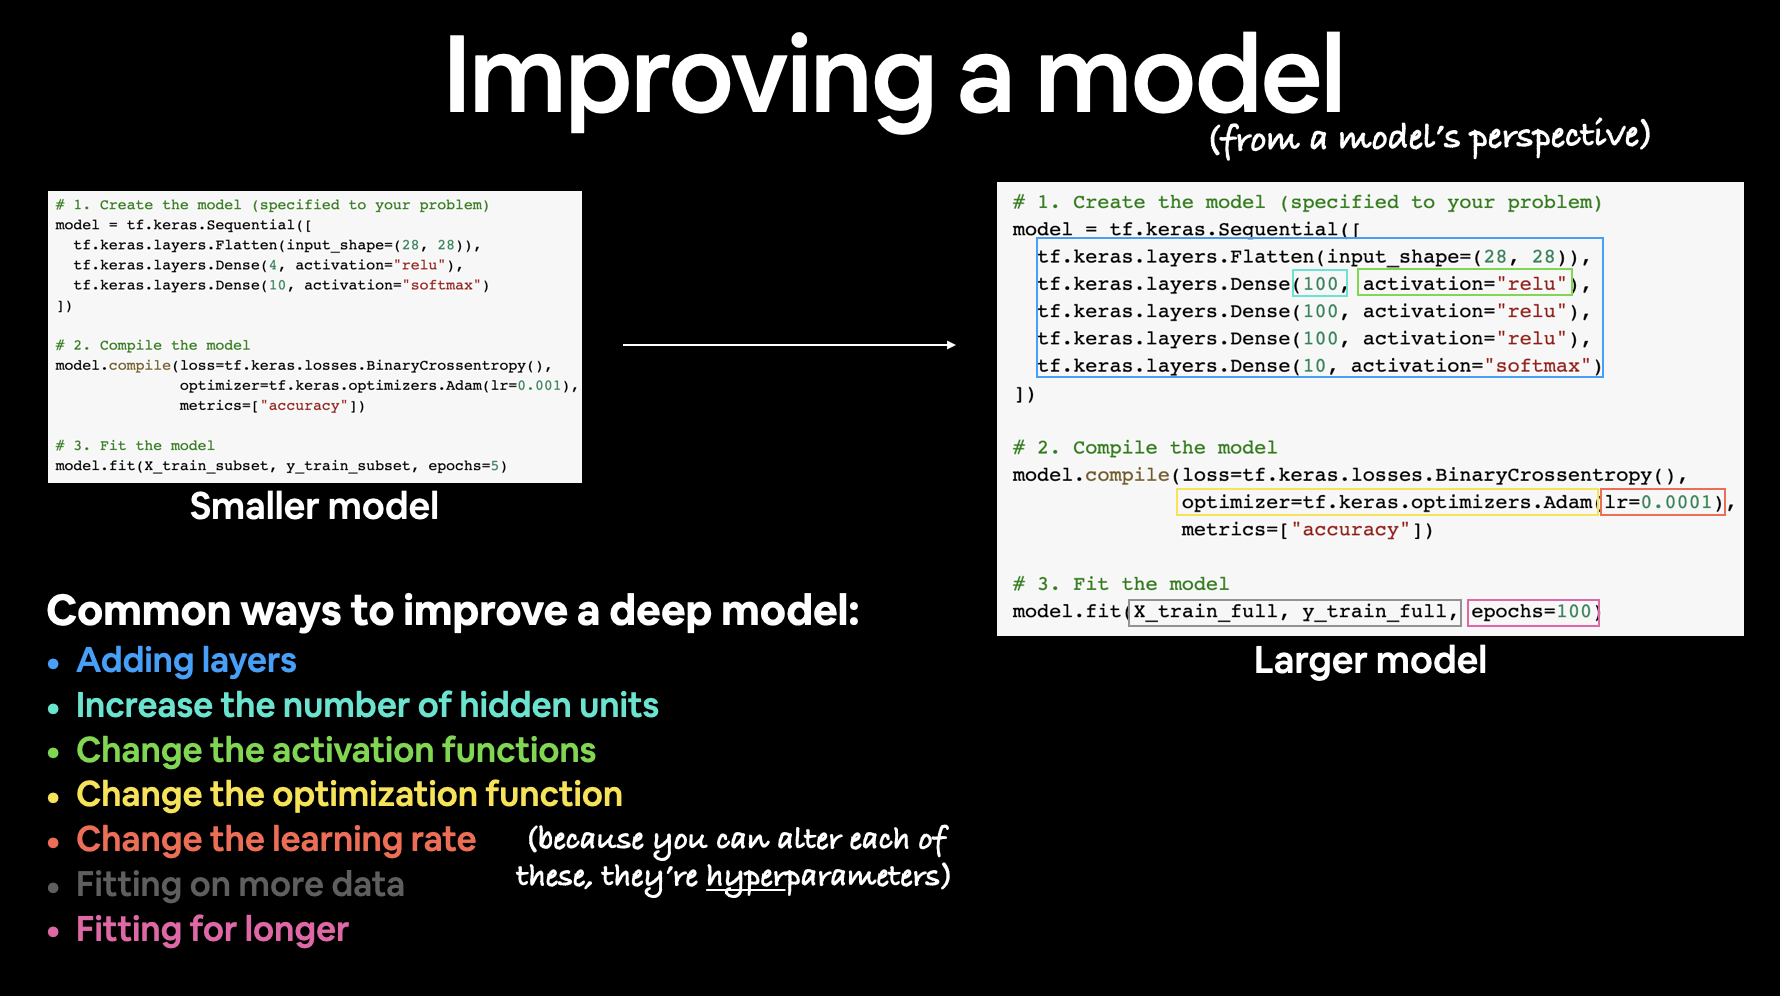


*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning) is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*


Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
 #Let's rebuild the model

 #Set random seed
 tf.random.set_seed(42)

 # Create a model (same as above)
 model = tf.keras.Sequential([ tf.keras.layers.Dense(1) ])

 # Compile model (same as above)
 model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

 # Fit model (this time we'll train for longer)
 model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 5


Epoch 1/100
1/1 [==============================] - 0s 377ms/step - loss: 17.2051 - mae: 17.2051
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 16.9238 - mae: 16.9238
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 16.6426 - mae: 16.6426
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 16.3613 - mae: 16.3613
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 16.0801 - mae: 16.0801
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 15.7988 - mae: 15.7988
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 15.5176 - mae: 15.5176
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 15.2363 - mae: 15.2363
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.9551 - mae: 14.9551
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 14.7488 - mae: 14.7488
Epoch 11/100
1/1 [==============================

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on `17.0` again?

In [ ]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 88ms/step


array([[29.609049]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

##**Evaluating a model**

A typical workflow you'll go through when building neural networks is:

    Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

###Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

- **The data** - what data are you working with? What does it look like?
- **The model** itself - what does the architecture look like? What are the different shapes?
- **The training of a model** - how does a model perform while it learns?
- **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since y = X + 10, we could make the labels like so:

In [ ]:
# Same result as above
y = X + 10
y


array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

##Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

- **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
- **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
- **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays

>🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should
always be kept separate from all other data).
We want our model to learn on training data and then evaluate it on test data to get an indication of
how well it generalizes to unseen examples.

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]
X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

##Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

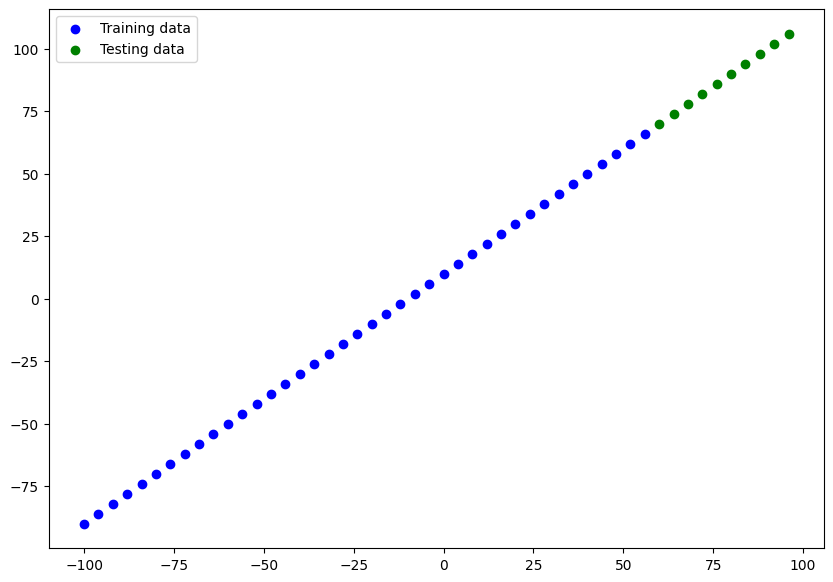

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #1 hidden unit
    ])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

##Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling `summary()` on it.

>🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [ ]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
    ])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.

- **Total params** - total number of parameters in the model.
- **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
- **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

>📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using `plot_model()`.

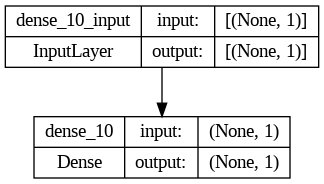

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In our case, the model we used only has an input and an output but visualizing more complicated models can be very helpful for debugging

##Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

# View the predictions
y_preds

1/1 [==============================] - 0s 59ms/step


array([[56.573475],
       [60.25783 ],
       [63.94219 ],
       [67.62655 ],
       [71.310905],
       [74.99526 ],
       [78.67962 ],
       [82.363976],
       [86.04833 ],
       [89.73269 ]], dtype=float32)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

>🔑 Note: If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")

    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show the legend
    plt.legend()


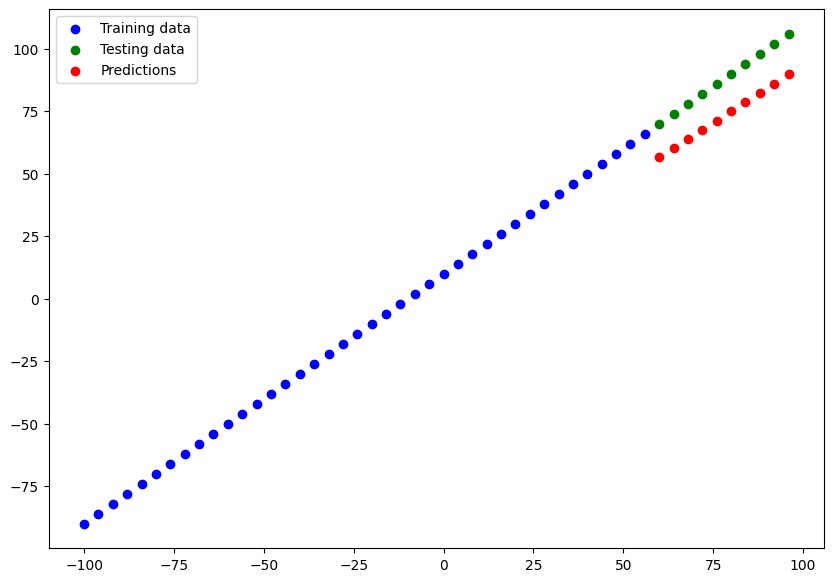

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

##Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

- **Mean absolute error (MAE)** - the mean difference between each of the predictions.
- **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test) #in the form loss, evaluation

1/1 [==============================] - 0s 53ms/step - loss: 14.8469 - mae: 14.8469


[14.846918106079102, 14.846918106079102]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.426525, 27.742168, 24.057812, 20.373451, 16.951275, 14.202843,
       12.128153, 10.727205, 10.      , 10.      ], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our `y_test` and `y_preds` tensors are different shapes.

In [ ]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[56.573475],
       [60.25783 ],
       [63.94219 ],
       [67.62655 ],
       [71.310905],
       [74.99526 ],
       [78.67962 ],
       [82.363976],
       [86.04833 ],
       [89.73269 ]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using `squeeze()`, it'll remove the the 1 dimension from our `y_preds` tensor, making it the same shape as `y_test`.

>🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [ ]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([56.573475, 60.25783 , 63.94219 , 67.62655 , 71.310905, 74.99526 ,
        78.67962 , 82.363976, 86.04833 , 89.73269 ], dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tenors the same shape, let's use our evaluation metrics.

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()
                                     ) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.846918>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze()
                                    )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=221.2529>

We can also calculate the MAE using pure TensorFlow functions.

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=14.846917343139648>

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [ ]:
def mae(y_test,
        y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test, y_pred)

  def mse(y_test,
          y_pred):
    """
    Calculates mean squared error between y_test and y_preds.
    """
    return tf.metrics.mean_squared_error(y_test, y_pred)

##Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. 'model_1' - same as original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**`Build model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
                )

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1),
            y_train,
            epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 22.8083 - mae: 22.8083
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0853 - mae: 11.0853
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 16.0322 - mae: 16.0322
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5098 - mae: 8.5098
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9813 - mae: 10.9813
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1465 - mae: 10.1465
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1694 - mae: 9.1694
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1206 - mae: 9.1206
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.1958 - mae: 15.1958
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8321 - mae: 7.8321
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 35ms/step


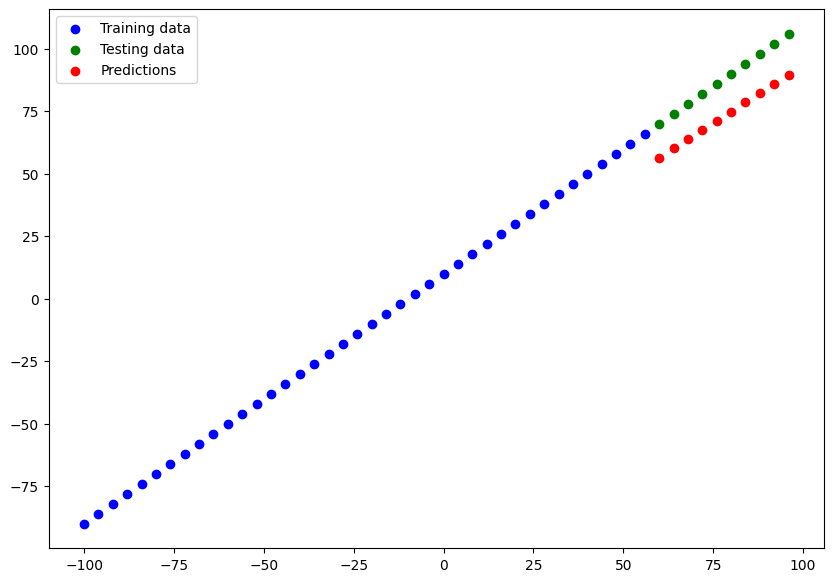

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_1)

In [ ]:
import numpy as np
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
#mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, #mse_1

(14.942808,)

**`Build model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # add a second layer
    ])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1),
            y_train,
            epochs=100,
            verbose=0)

# set verbose to 0 for less output

1/1 [==============================] - 0s 35ms/step


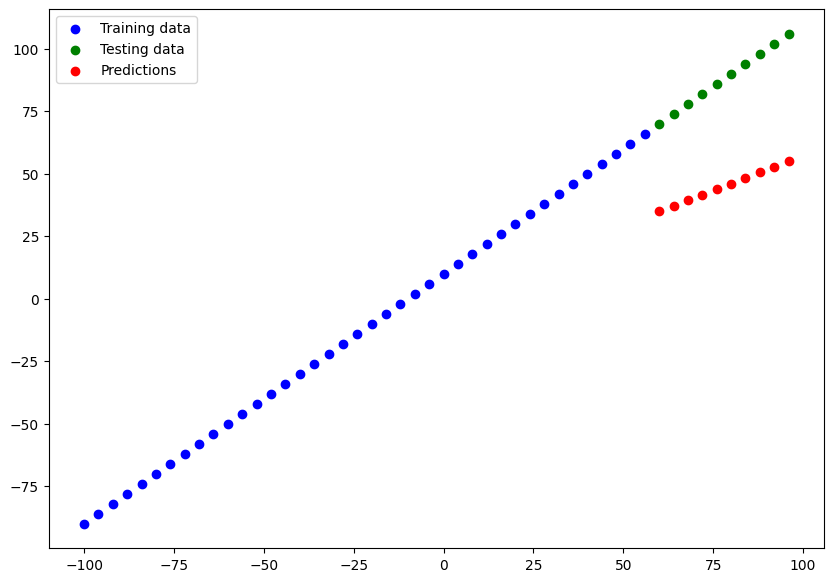

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

Not so much better, lets see the next model

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
#mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, #mse_2

(43.05047,)

**`Build model_3`**

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 24ms/step


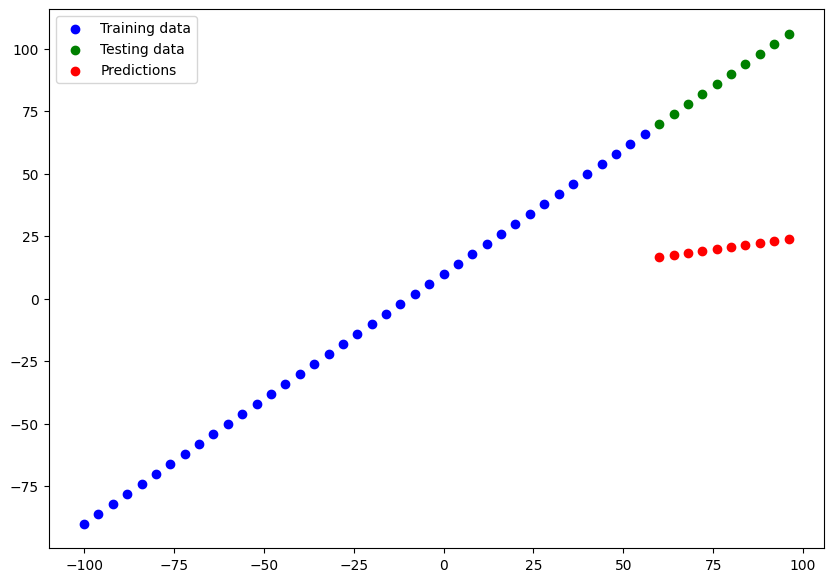

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
#mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, #mse_3

(67.64772,)

##Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", mae_1], ["model_2", mae_2], ["model_3", mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
all_results

,model,mae
0,model_1,14.942808
1,model_2,43.050468
2,model_3,67.647720


From our experiments, it looks like `model_1` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

>🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

##Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

>📖 Resource: But as you build more models, you'll want to look into using tools such as:

- [TensorBoard](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
- [Weights & Biases](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

##Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow:

1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


##Loading a model

We can load a saved model using the `load_model()` method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's test it out.

In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 62ms/step


True

Loading in from the HDF5 is much the same.

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 53ms/step


True

##Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

- Right click on the file in the files pane and click 'download'.
- Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>